In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# 하이퍼 파라미터 최적화 라이브러리
from sklearn.model_selection import GridSearchCV
import optuna
# 랜덤포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 그래프 한글 깨짐 방지
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
# 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
# train 데이터 보기
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [5]:
# test 데이터 보기
test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


<AxesSubplot:title={'center':'착과량(int)과의 상관관계'}>

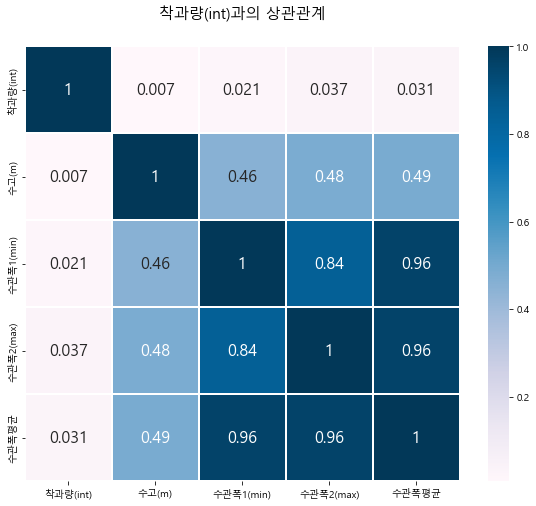

In [6]:
# 착과량과 수고,수관폭1,2,평균의 상관관계 확인
# 상관관계 히트맵
data = (train[['착과량(int)','수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균']])
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("착과량(int)과의 상관관계", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [16]:
# 수고, 수관폭 변수는 상관관계가 적기에 제거하기로 판단함
# train, validaton data set 만들기
X_train = train.drop(['ID','착과량(int)','수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균'], axis=1)
y_train = train['착과량(int)']
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=38)

In [20]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

0.07599791867199689

In [72]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 12)
    rf_n_estimators = trial.suggest_int('n_estimators', 10, 500)
    rf_min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 18)
    rf_min_samples_split = trial.suggest_int('min_samples_split',2, 20)
    rf_random_state = trial.suggest_int('random_state',1,1000)
    
    model = RandomForestRegressor(
        random_state = rf_random_state,
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_leaf=rf_min_samples_leaf,
        min_samples_split=rf_min_samples_split
    )
    
    
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    nmae = NMAE(y_val, pred)
    return nmae

In [73]:
study_rf = optuna.create_study(direction='minimize')

[I 2022-12-13 18:20:29,420] A new study created in memory with name: no-name-d1cb2034-555c-4996-800a-b03b8663d1d7


In [74]:
study_rf.optimize(objective, n_trials=10000)

[I 2022-12-13 18:20:33,129] Trial 0 finished with value: 0.07617665105206554 and parameters: {'rf_max_depth': 3, 'n_estimators': 137, 'min_samples_leaf': 10, 'min_samples_split': 18, 'random_state': 803}. Best is trial 0 with value: 0.07617665105206554.
[I 2022-12-13 18:20:41,452] Trial 1 finished with value: 0.07563289621881444 and parameters: {'rf_max_depth': 5, 'n_estimators': 271, 'min_samples_leaf': 16, 'min_samples_split': 10, 'random_state': 903}. Best is trial 1 with value: 0.07563289621881444.
[I 2022-12-13 18:20:54,472] Trial 2 finished with value: 0.07565985815990847 and parameters: {'rf_max_depth': 6, 'n_estimators': 389, 'min_samples_leaf': 15, 'min_samples_split': 12, 'random_state': 431}. Best is trial 1 with value: 0.07563289621881444.
[I 2022-12-13 18:20:58,359] Trial 3 finished with value: 0.07545522807669462 and parameters: {'rf_max_depth': 4, 'n_estimators': 152, 'min_samples_leaf': 17, 'min_samples_split': 16, 'random_state': 200}. Best is trial 3 with value: 0.075

[I 2022-12-13 18:24:07,084] Trial 31 finished with value: 0.07556219582552773 and parameters: {'rf_max_depth': 4, 'n_estimators': 162, 'min_samples_leaf': 17, 'min_samples_split': 16, 'random_state': 174}. Best is trial 7 with value: 0.07537569402548736.
[I 2022-12-13 18:24:10,581] Trial 32 finished with value: 0.07550727925239725 and parameters: {'rf_max_depth': 4, 'n_estimators': 131, 'min_samples_leaf': 17, 'min_samples_split': 12, 'random_state': 214}. Best is trial 7 with value: 0.07537569402548736.
[I 2022-12-13 18:24:12,566] Trial 33 finished with value: 0.07540694357606474 and parameters: {'rf_max_depth': 5, 'n_estimators': 63, 'min_samples_leaf': 15, 'min_samples_split': 17, 'random_state': 937}. Best is trial 7 with value: 0.07537569402548736.
[I 2022-12-13 18:24:14,329] Trial 34 finished with value: 0.0754738024015969 and parameters: {'rf_max_depth': 5, 'n_estimators': 56, 'min_samples_leaf': 14, 'min_samples_split': 19, 'random_state': 977}. Best is trial 7 with value: 0.07

[I 2022-12-13 18:27:55,169] Trial 62 finished with value: 0.07598289778471018 and parameters: {'rf_max_depth': 3, 'n_estimators': 189, 'min_samples_leaf': 16, 'min_samples_split': 15, 'random_state': 202}. Best is trial 49 with value: 0.07532708432810531.
[I 2022-12-13 18:28:00,612] Trial 63 finished with value: 0.07544542509480316 and parameters: {'rf_max_depth': 5, 'n_estimators': 157, 'min_samples_leaf': 15, 'min_samples_split': 17, 'random_state': 167}. Best is trial 49 with value: 0.07532708432810531.
[I 2022-12-13 18:28:08,122] Trial 64 finished with value: 0.07545415630377851 and parameters: {'rf_max_depth': 5, 'n_estimators': 213, 'min_samples_leaf': 14, 'min_samples_split': 14, 'random_state': 33}. Best is trial 49 with value: 0.07532708432810531.
[I 2022-12-13 18:28:13,194] Trial 65 finished with value: 0.0754306324968957 and parameters: {'rf_max_depth': 5, 'n_estimators': 148, 'min_samples_leaf': 13, 'min_samples_split': 12, 'random_state': 159}. Best is trial 49 with value:

[I 2022-12-13 18:29:42,023] Trial 93 finished with value: 0.07642289953299447 and parameters: {'rf_max_depth': 5, 'n_estimators': 41, 'min_samples_leaf': 14, 'min_samples_split': 8, 'random_state': 861}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:29:43,990] Trial 94 finished with value: 0.07564056099410083 and parameters: {'rf_max_depth': 5, 'n_estimators': 59, 'min_samples_leaf': 16, 'min_samples_split': 9, 'random_state': 819}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:29:52,616] Trial 95 finished with value: 0.07610207651868064 and parameters: {'rf_max_depth': 7, 'n_estimators': 207, 'min_samples_leaf': 13, 'min_samples_split': 8, 'random_state': 746}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:29:55,303] Trial 96 finished with value: 0.07532047030971466 and parameters: {'rf_max_depth': 4, 'n_estimators': 94, 'min_samples_leaf': 14, 'min_samples_split': 11, 'random_state': 877}. Best is trial 70 with value: 0.0

[I 2022-12-13 18:30:55,782] Trial 124 finished with value: 0.07536861604722889 and parameters: {'rf_max_depth': 4, 'n_estimators': 124, 'min_samples_leaf': 14, 'min_samples_split': 11, 'random_state': 901}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:30:57,115] Trial 125 finished with value: 0.07625363598749173 and parameters: {'rf_max_depth': 3, 'n_estimators': 57, 'min_samples_leaf': 15, 'min_samples_split': 12, 'random_state': 959}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:30:59,396] Trial 126 finished with value: 0.07529309351555177 and parameters: {'rf_max_depth': 5, 'n_estimators': 67, 'min_samples_leaf': 3, 'min_samples_split': 11, 'random_state': 1000}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:31:02,444] Trial 127 finished with value: 0.07575944655987267 and parameters: {'rf_max_depth': 5, 'n_estimators': 88, 'min_samples_leaf': 3, 'min_samples_split': 12, 'random_state': 771}. Best is trial 70 with valu

[I 2022-12-13 18:31:45,759] Trial 155 finished with value: 0.07569761292620059 and parameters: {'rf_max_depth': 4, 'n_estimators': 87, 'min_samples_leaf': 6, 'min_samples_split': 10, 'random_state': 961}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:31:46,727] Trial 156 finished with value: 0.07565281225081183 and parameters: {'rf_max_depth': 4, 'n_estimators': 34, 'min_samples_leaf': 3, 'min_samples_split': 11, 'random_state': 980}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:31:50,381] Trial 157 finished with value: 0.07559154272827896 and parameters: {'rf_max_depth': 5, 'n_estimators': 107, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 930}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:31:50,867] Trial 158 finished with value: 0.0772020566188839 and parameters: {'rf_max_depth': 8, 'n_estimators': 10, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 890}. Best is trial 70 with value: 0.0

[I 2022-12-13 18:32:45,406] Trial 186 finished with value: 0.07540642227854975 and parameters: {'rf_max_depth': 4, 'n_estimators': 47, 'min_samples_leaf': 12, 'min_samples_split': 9, 'random_state': 949}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:32:47,404] Trial 187 finished with value: 0.07551600165141313 and parameters: {'rf_max_depth': 4, 'n_estimators': 69, 'min_samples_leaf': 13, 'min_samples_split': 9, 'random_state': 965}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:32:48,385] Trial 188 finished with value: 0.07606057126098545 and parameters: {'rf_max_depth': 3, 'n_estimators': 41, 'min_samples_leaf': 12, 'min_samples_split': 9, 'random_state': 999}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:32:49,662] Trial 189 finished with value: 0.07643486843596867 and parameters: {'rf_max_depth': 6, 'n_estimators': 32, 'min_samples_leaf': 6, 'min_samples_split': 8, 'random_state': 930}. Best is trial 70 with value: 0.

[I 2022-12-13 18:34:00,691] Trial 217 finished with value: 0.07648480990756053 and parameters: {'rf_max_depth': 4, 'n_estimators': 18, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 878}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:34:03,026] Trial 218 finished with value: 0.0760937582963373 and parameters: {'rf_max_depth': 6, 'n_estimators': 60, 'min_samples_leaf': 7, 'min_samples_split': 8, 'random_state': 928}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:34:04,378] Trial 219 finished with value: 0.07578867884689817 and parameters: {'rf_max_depth': 5, 'n_estimators': 40, 'min_samples_leaf': 14, 'min_samples_split': 10, 'random_state': 950}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:34:07,015] Trial 220 finished with value: 0.07637103186751183 and parameters: {'rf_max_depth': 3, 'n_estimators': 112, 'min_samples_leaf': 11, 'min_samples_split': 11, 'random_state': 39}. Best is trial 70 with value: 0.

[I 2022-12-13 18:35:00,368] Trial 248 finished with value: 0.07524402619105162 and parameters: {'rf_max_depth': 5, 'n_estimators': 54, 'min_samples_leaf': 4, 'min_samples_split': 14, 'random_state': 998}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:35:02,192] Trial 249 finished with value: 0.07524900994702101 and parameters: {'rf_max_depth': 5, 'n_estimators': 52, 'min_samples_leaf': 4, 'min_samples_split': 11, 'random_state': 1000}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:35:04,049] Trial 250 finished with value: 0.07559429221209618 and parameters: {'rf_max_depth': 5, 'n_estimators': 55, 'min_samples_leaf': 4, 'min_samples_split': 11, 'random_state': 991}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:35:05,487] Trial 251 finished with value: 0.07563678676316118 and parameters: {'rf_max_depth': 5, 'n_estimators': 42, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 989}. Best is trial 70 with value: 0

[I 2022-12-13 18:35:47,037] Trial 279 finished with value: 0.07551966663719518 and parameters: {'rf_max_depth': 6, 'n_estimators': 50, 'min_samples_leaf': 4, 'min_samples_split': 6, 'random_state': 921}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:35:48,890] Trial 280 finished with value: 0.07618528335946834 and parameters: {'rf_max_depth': 7, 'n_estimators': 40, 'min_samples_leaf': 3, 'min_samples_split': 7, 'random_state': 1000}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:35:50,892] Trial 281 finished with value: 0.07556728403459902 and parameters: {'rf_max_depth': 5, 'n_estimators': 59, 'min_samples_leaf': 6, 'min_samples_split': 8, 'random_state': 964}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:35:52,717] Trial 282 finished with value: 0.07531718462500973 and parameters: {'rf_max_depth': 5, 'n_estimators': 52, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 16}. Best is trial 70 with value: 0.074

[I 2022-12-13 18:36:32,451] Trial 310 finished with value: 0.07594281118486729 and parameters: {'rf_max_depth': 6, 'n_estimators': 16, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 980}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:36:33,441] Trial 311 finished with value: 0.07558438301438011 and parameters: {'rf_max_depth': 5, 'n_estimators': 28, 'min_samples_leaf': 5, 'min_samples_split': 9, 'random_state': 948}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:36:34,116] Trial 312 finished with value: 0.07503409494544659 and parameters: {'rf_max_depth': 5, 'n_estimators': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 983}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:36:34,730] Trial 313 finished with value: 0.0758803455319107 and parameters: {'rf_max_depth': 5, 'n_estimators': 17, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 982}. Best is trial 70 with value: 0.0749

[I 2022-12-13 18:37:28,418] Trial 341 finished with value: 0.07577475011301207 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 3, 'min_samples_split': 19, 'random_state': 933}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:37:28,773] Trial 342 finished with value: 0.07552116373265177 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 2, 'min_samples_split': 18, 'random_state': 91}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:37:29,604] Trial 343 finished with value: 0.07570514112237994 and parameters: {'rf_max_depth': 5, 'n_estimators': 21, 'min_samples_leaf': 3, 'min_samples_split': 20, 'random_state': 946}. Best is trial 70 with value: 0.07498519953896722.
[I 2022-12-13 18:37:39,449] Trial 344 finished with value: 0.07536796236327997 and parameters: {'rf_max_depth': 5, 'n_estimators': 279, 'min_samples_leaf': 3, 'min_samples_split': 20, 'random_state': 929}. Best is trial 70 with value: 0

[I 2022-12-13 18:38:41,453] Trial 372 finished with value: 0.0750661292194832 and parameters: {'rf_max_depth': 5, 'n_estimators': 25, 'min_samples_leaf': 4, 'min_samples_split': 5, 'random_state': 9}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:38:42,180] Trial 373 finished with value: 0.07611936126445892 and parameters: {'rf_max_depth': 5, 'n_estimators': 21, 'min_samples_leaf': 4, 'min_samples_split': 19, 'random_state': 28}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:38:43,319] Trial 374 finished with value: 0.07553058785082085 and parameters: {'rf_max_depth': 6, 'n_estimators': 29, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 17}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:38:44,024] Trial 375 finished with value: 0.07523924760846414 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 4, 'min_samples_split': 8, 'random_state': 51}. Best is trial 363 with value: 0.0748610

[I 2022-12-13 18:39:28,137] Trial 403 finished with value: 0.0755075185763151 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 13, 'min_samples_split': 6, 'random_state': 558}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:39:29,865] Trial 404 finished with value: 0.07576599354584242 and parameters: {'rf_max_depth': 5, 'n_estimators': 47, 'min_samples_leaf': 4, 'min_samples_split': 19, 'random_state': 930}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:39:31,161] Trial 405 finished with value: 0.07520606491608069 and parameters: {'rf_max_depth': 5, 'n_estimators': 37, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 983}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:39:32,677] Trial 406 finished with value: 0.0754367582250367 and parameters: {'rf_max_depth': 6, 'n_estimators': 38, 'min_samples_leaf': 5, 'min_samples_split': 9, 'random_state': 952}. Best is trial 363 with value: 0.0

[I 2022-12-13 18:40:21,313] Trial 434 finished with value: 0.07629048494188514 and parameters: {'rf_max_depth': 3, 'n_estimators': 41, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 1000}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:40:22,631] Trial 435 finished with value: 0.0769751793673195 and parameters: {'rf_max_depth': 10, 'n_estimators': 24, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 969}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:40:24,590] Trial 436 finished with value: 0.07627661900298524 and parameters: {'rf_max_depth': 6, 'n_estimators': 50, 'min_samples_leaf': 4, 'min_samples_split': 18, 'random_state': 43}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:40:25,885] Trial 437 finished with value: 0.07544130825155418 and parameters: {'rf_max_depth': 5, 'n_estimators': 35, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 981}. Best is trial 363 with value: 0.0

[I 2022-12-13 18:41:03,168] Trial 465 finished with value: 0.07573870113516736 and parameters: {'rf_max_depth': 6, 'n_estimators': 10, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 998}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:41:03,891] Trial 466 finished with value: 0.07599179065074885 and parameters: {'rf_max_depth': 5, 'n_estimators': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 963}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:41:04,818] Trial 467 finished with value: 0.07548223188242786 and parameters: {'rf_max_depth': 5, 'n_estimators': 25, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 984}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:41:05,446] Trial 468 finished with value: 0.07564247230221162 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 961}. Best is trial 363 with value: 0.0

[I 2022-12-13 18:42:21,908] Trial 496 finished with value: 0.0759941594913928 and parameters: {'rf_max_depth': 5, 'n_estimators': 43, 'min_samples_leaf': 5, 'min_samples_split': 9, 'random_state': 317}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:42:22,582] Trial 497 finished with value: 0.07564312376462214 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 987}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:42:23,562] Trial 498 finished with value: 0.13231497691118158 and parameters: {'rf_max_depth': 2, 'n_estimators': 59, 'min_samples_leaf': 4, 'min_samples_split': 20, 'random_state': 375}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:42:24,594] Trial 499 finished with value: 0.07527537386735292 and parameters: {'rf_max_depth': 4, 'n_estimators': 35, 'min_samples_leaf': 12, 'min_samples_split': 19, 'random_state': 946}. Best is trial 363 with value: 0.

[I 2022-12-13 18:42:56,294] Trial 527 finished with value: 0.07707231633067332 and parameters: {'rf_max_depth': 10, 'n_estimators': 45, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 911}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:42:57,112] Trial 528 finished with value: 0.07533469904730745 and parameters: {'rf_max_depth': 4, 'n_estimators': 27, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 336}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:42:57,831] Trial 529 finished with value: 0.07620691297792827 and parameters: {'rf_max_depth': 5, 'n_estimators': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'random_state': 141}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:42:59,166] Trial 530 finished with value: 0.07559198132139736 and parameters: {'rf_max_depth': 5, 'n_estimators': 39, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 654}. Best is trial 363 with value: 0.

[I 2022-12-13 18:43:55,689] Trial 558 finished with value: 0.07567835488406947 and parameters: {'rf_max_depth': 4, 'n_estimators': 47, 'min_samples_leaf': 10, 'min_samples_split': 7, 'random_state': 139}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:43:57,446] Trial 559 finished with value: 0.07547993531857981 and parameters: {'rf_max_depth': 5, 'n_estimators': 48, 'min_samples_leaf': 4, 'min_samples_split': 8, 'random_state': 49}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:44:00,841] Trial 560 finished with value: 0.07692141796090325 and parameters: {'rf_max_depth': 11, 'n_estimators': 60, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 110}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:44:02,551] Trial 561 finished with value: 0.07538566653481373 and parameters: {'rf_max_depth': 6, 'n_estimators': 43, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 81}. Best is trial 363 with value: 0.07

[I 2022-12-13 18:44:54,636] Trial 589 finished with value: 0.07518971495853839 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 149}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:44:55,830] Trial 590 finished with value: 0.07519521669345776 and parameters: {'rf_max_depth': 5, 'n_estimators': 34, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 203}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:44:57,723] Trial 591 finished with value: 0.07547799855900826 and parameters: {'rf_max_depth': 5, 'n_estimators': 56, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 423}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:44:58,551] Trial 592 finished with value: 0.07570551716629408 and parameters: {'rf_max_depth': 4, 'n_estimators': 26, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 933}. Best is trial 363 with value: 0.07

[I 2022-12-13 18:45:39,909] Trial 620 finished with value: 0.07564487321232831 and parameters: {'rf_max_depth': 5, 'n_estimators': 162, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 97}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:45:40,585] Trial 621 finished with value: 0.07573304106101615 and parameters: {'rf_max_depth': 5, 'n_estimators': 20, 'min_samples_leaf': 14, 'min_samples_split': 6, 'random_state': 937}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:45:41,733] Trial 622 finished with value: 0.0755766603724112 and parameters: {'rf_max_depth': 5, 'n_estimators': 33, 'min_samples_leaf': 13, 'min_samples_split': 7, 'random_state': 465}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:45:42,405] Trial 623 finished with value: 0.07544105794760472 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 9, 'min_samples_split': 16, 'random_state': 61}. Best is trial 363 with value: 0.0

[I 2022-12-13 18:46:48,158] Trial 651 finished with value: 0.07599913308083343 and parameters: {'rf_max_depth': 6, 'n_estimators': 33, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 78}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:46:49,118] Trial 652 finished with value: 0.07580849941922212 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 4, 'min_samples_split': 4, 'random_state': 675}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:46:50,433] Trial 653 finished with value: 0.07561281873326693 and parameters: {'rf_max_depth': 4, 'n_estimators': 44, 'min_samples_leaf': 11, 'min_samples_split': 9, 'random_state': 362}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:46:50,760] Trial 654 finished with value: 0.07590650352164373 and parameters: {'rf_max_depth': 4, 'n_estimators': 10, 'min_samples_leaf': 5, 'min_samples_split': 7, 'random_state': 914}. Best is trial 363 with value: 0.07

[I 2022-12-13 18:47:19,804] Trial 682 finished with value: 0.07560804000309955 and parameters: {'rf_max_depth': 5, 'n_estimators': 47, 'min_samples_leaf': 13, 'min_samples_split': 9, 'random_state': 169}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:47:20,972] Trial 683 finished with value: 0.07556088966061238 and parameters: {'rf_max_depth': 5, 'n_estimators': 32, 'min_samples_leaf': 14, 'min_samples_split': 9, 'random_state': 327}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:47:21,636] Trial 684 finished with value: 0.07571226377104454 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 444}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:47:22,588] Trial 685 finished with value: 0.07608060806973718 and parameters: {'rf_max_depth': 5, 'n_estimators': 26, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 214}. Best is trial 363 with value: 0

[I 2022-12-13 18:48:08,649] Trial 713 finished with value: 0.07649148990461596 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 13, 'min_samples_split': 8, 'random_state': 918}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:48:09,912] Trial 714 finished with value: 0.07602886729890262 and parameters: {'rf_max_depth': 5, 'n_estimators': 37, 'min_samples_leaf': 13, 'min_samples_split': 9, 'random_state': 962}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:48:19,316] Trial 715 finished with value: 0.0756324743910036 and parameters: {'rf_max_depth': 5, 'n_estimators': 280, 'min_samples_leaf': 12, 'min_samples_split': 10, 'random_state': 38}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:48:20,234] Trial 716 finished with value: 0.07545783118986647 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 11, 'min_samples_split': 9, 'random_state': 941}. Best is trial 363 with value: 

[I 2022-12-13 18:49:03,789] Trial 744 finished with value: 0.07525723496127112 and parameters: {'rf_max_depth': 4, 'n_estimators': 39, 'min_samples_leaf': 13, 'min_samples_split': 7, 'random_state': 85}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:49:04,780] Trial 745 finished with value: 0.07677939809836318 and parameters: {'rf_max_depth': 11, 'n_estimators': 18, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 38}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:49:05,323] Trial 746 finished with value: 0.07786302335921788 and parameters: {'rf_max_depth': 8, 'n_estimators': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 1000}. Best is trial 363 with value: 0.0748610718571977.
[I 2022-12-13 18:49:06,445] Trial 747 finished with value: 0.07586462236280266 and parameters: {'rf_max_depth': 5, 'n_estimators': 32, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 967}. Best is trial 363 with value: 0.0

[I 2022-12-13 18:49:54,616] Trial 775 finished with value: 0.07546915573090428 and parameters: {'rf_max_depth': 5, 'n_estimators': 398, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 924}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:49:54,989] Trial 776 finished with value: 0.07592614763847488 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 13, 'min_samples_split': 9, 'random_state': 986}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:49:56,637] Trial 777 finished with value: 0.07565556800941364 and parameters: {'rf_max_depth': 6, 'n_estimators': 41, 'min_samples_leaf': 5, 'min_samples_split': 10, 'random_state': 1000}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:49:58,410] Trial 778 finished with value: 0.0754408949095551 and parameters: {'rf_max_depth': 5, 'n_estimators': 49, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 955}. Best is trial 752 with value

[I 2022-12-13 18:50:39,693] Trial 806 finished with value: 0.07543877441561692 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 936}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:50:40,699] Trial 807 finished with value: 0.0760839791480219 and parameters: {'rf_max_depth': 5, 'n_estimators': 28, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 363}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:50:42,294] Trial 808 finished with value: 0.07554700518042833 and parameters: {'rf_max_depth': 5, 'n_estimators': 47, 'min_samples_leaf': 14, 'min_samples_split': 11, 'random_state': 75}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:50:43,024] Trial 809 finished with value: 0.07592885164327892 and parameters: {'rf_max_depth': 6, 'n_estimators': 18, 'min_samples_leaf': 13, 'min_samples_split': 3, 'random_state': 24}. Best is trial 752 with value: 0

[I 2022-12-13 18:51:26,966] Trial 837 finished with value: 0.075367178849247 and parameters: {'rf_max_depth': 4, 'n_estimators': 30, 'min_samples_leaf': 14, 'min_samples_split': 2, 'random_state': 19}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:51:27,694] Trial 838 finished with value: 0.0757793713074662 and parameters: {'rf_max_depth': 5, 'n_estimators': 20, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 44}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:51:29,032] Trial 839 finished with value: 0.07581279047673155 and parameters: {'rf_max_depth': 5, 'n_estimators': 39, 'min_samples_leaf': 13, 'min_samples_split': 7, 'random_state': 56}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:51:30,865] Trial 840 finished with value: 0.07574741263704148 and parameters: {'rf_max_depth': 5, 'n_estimators': 52, 'min_samples_leaf': 4, 'min_samples_split': 11, 'random_state': 159}. Best is trial 752 with value: 0.07

[I 2022-12-13 18:51:53,243] Trial 868 finished with value: 0.07607191424859602 and parameters: {'rf_max_depth': 4, 'n_estimators': 19, 'min_samples_leaf': 5, 'min_samples_split': 10, 'random_state': 21}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:51:54,335] Trial 869 finished with value: 0.0757111246980767 and parameters: {'rf_max_depth': 5, 'n_estimators': 31, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 673}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:51:54,862] Trial 870 finished with value: 0.07615174692672387 and parameters: {'rf_max_depth': 3, 'n_estimators': 21, 'min_samples_leaf': 13, 'min_samples_split': 10, 'random_state': 953}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:51:55,225] Trial 871 finished with value: 0.07589909481566615 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'random_state': 182}. Best is trial 752 with value:

[I 2022-12-13 18:53:28,761] Trial 899 finished with value: 0.0754114962628421 and parameters: {'rf_max_depth': 5, 'n_estimators': 56, 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 909}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:53:29,383] Trial 900 finished with value: 0.07519272689476407 and parameters: {'rf_max_depth': 4, 'n_estimators': 20, 'min_samples_leaf': 13, 'min_samples_split': 8, 'random_state': 88}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:53:29,757] Trial 901 finished with value: 0.07552074001539955 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 5, 'min_samples_split': 8, 'random_state': 582}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:53:31,114] Trial 902 finished with value: 0.07529869011761996 and parameters: {'rf_max_depth': 5, 'n_estimators': 38, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 710}. Best is trial 752 with value: 0.

[I 2022-12-13 18:54:08,029] Trial 930 finished with value: 0.07557578773726888 and parameters: {'rf_max_depth': 5, 'n_estimators': 16, 'min_samples_leaf': 6, 'min_samples_split': 11, 'random_state': 34}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:54:08,414] Trial 931 finished with value: 0.0761251932335476 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'random_state': 15}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:54:09,035] Trial 932 finished with value: 0.0760141088030771 and parameters: {'rf_max_depth': 5, 'n_estimators': 17, 'min_samples_leaf': 5, 'min_samples_split': 11, 'random_state': 4}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:54:09,705] Trial 933 finished with value: 0.07585054104647182 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 5, 'min_samples_split': 12, 'random_state': 45}. Best is trial 752 with value: 0.07

[I 2022-12-13 18:54:51,219] Trial 961 finished with value: 0.07608070259946272 and parameters: {'rf_max_depth': 6, 'n_estimators': 42, 'min_samples_leaf': 5, 'min_samples_split': 11, 'random_state': 44}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:54:52,111] Trial 962 finished with value: 0.07556159105178147 and parameters: {'rf_max_depth': 7, 'n_estimators': 19, 'min_samples_leaf': 5, 'min_samples_split': 11, 'random_state': 18}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:54:53,207] Trial 963 finished with value: 0.0758538843896825 and parameters: {'rf_max_depth': 5, 'n_estimators': 30, 'min_samples_leaf': 5, 'min_samples_split': 11, 'random_state': 72}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:54:53,911] Trial 964 finished with value: 0.07543229837050013 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 4, 'min_samples_split': 12, 'random_state': 36}. Best is trial 752 with value: 0.

[I 2022-12-13 18:55:45,017] Trial 992 finished with value: 0.07590369291110331 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 7, 'min_samples_split': 8, 'random_state': 17}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:55:45,973] Trial 993 finished with value: 0.0759406277280829 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 938}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:55:47,317] Trial 994 finished with value: 0.0761356246581778 and parameters: {'rf_max_depth': 5, 'n_estimators': 38, 'min_samples_leaf': 5, 'min_samples_split': 11, 'random_state': 74}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:55:48,068] Trial 995 finished with value: 0.07565293608485348 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 3, 'min_samples_split': 9, 'random_state': 89}. Best is trial 752 with value: 0.074

[I 2022-12-13 18:56:29,195] Trial 1023 finished with value: 0.07538183785594157 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 905}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:56:29,980] Trial 1024 finished with value: 0.07599564874549704 and parameters: {'rf_max_depth': 5, 'n_estimators': 22, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 839}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:56:30,406] Trial 1025 finished with value: 0.07682818653153609 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 956}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:56:31,169] Trial 1026 finished with value: 0.07700684205750105 and parameters: {'rf_max_depth': 6, 'n_estimators': 17, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 940}. Best is trial 752 with valu

[I 2022-12-13 18:56:50,233] Trial 1054 finished with value: 0.07574352627452813 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 893}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:56:51,273] Trial 1055 finished with value: 0.07556139886378527 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 3, 'min_samples_split': 7, 'random_state': 854}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:56:51,668] Trial 1056 finished with value: 0.07525977528142058 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 831}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:56:52,404] Trial 1057 finished with value: 0.07522734578505069 and parameters: {'rf_max_depth': 6, 'n_estimators': 18, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 910}. Best is trial 752 with valu

[I 2022-12-13 18:57:47,050] Trial 1085 finished with value: 0.07605436474993806 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 929}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:57:47,843] Trial 1086 finished with value: 0.07552291496691876 and parameters: {'rf_max_depth': 5, 'n_estimators': 21, 'min_samples_leaf': 3, 'min_samples_split': 6, 'random_state': 958}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:57:49,626] Trial 1087 finished with value: 0.07589742119817676 and parameters: {'rf_max_depth': 6, 'n_estimators': 44, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 838}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:57:50,302] Trial 1088 finished with value: 0.07540868475264909 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 11, 'min_samples_split': 8, 'random_state': 908}. Best is trial 752 with va

[I 2022-12-13 18:58:34,654] Trial 1116 finished with value: 0.0774963890145993 and parameters: {'rf_max_depth': 7, 'n_estimators': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'random_state': 901}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:58:35,365] Trial 1117 finished with value: 0.07596250224656761 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 931}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:58:35,757] Trial 1118 finished with value: 0.07597187749361453 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 907}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:58:43,183] Trial 1119 finished with value: 0.07580352670486354 and parameters: {'rf_max_depth': 6, 'n_estimators': 181, 'min_samples_leaf': 2, 'min_samples_split': 7, 'random_state': 912}. Best is trial 752 with valu

[I 2022-12-13 18:59:45,369] Trial 1147 finished with value: 0.07516753450673383 and parameters: {'rf_max_depth': 5, 'n_estimators': 36, 'min_samples_leaf': 2, 'min_samples_split': 4, 'random_state': 618}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:59:46,180] Trial 1148 finished with value: 0.0759370129829121 and parameters: {'rf_max_depth': 6, 'n_estimators': 18, 'min_samples_leaf': 3, 'min_samples_split': 5, 'random_state': 639}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:59:48,069] Trial 1149 finished with value: 0.07595503617709107 and parameters: {'rf_max_depth': 5, 'n_estimators': 52, 'min_samples_leaf': 3, 'min_samples_split': 6, 'random_state': 508}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 18:59:49,101] Trial 1150 finished with value: 0.0764850391971375 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 613}. Best is trial 752 with value:

[I 2022-12-13 19:00:34,554] Trial 1178 finished with value: 0.07594251368042276 and parameters: {'rf_max_depth': 5, 'n_estimators': 35, 'min_samples_leaf': 11, 'min_samples_split': 7, 'random_state': 954}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:00:34,962] Trial 1179 finished with value: 0.07595094671811731 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'random_state': 938}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:00:35,952] Trial 1180 finished with value: 0.07542972446366936 and parameters: {'rf_max_depth': 5, 'n_estimators': 27, 'min_samples_leaf': 12, 'min_samples_split': 7, 'random_state': 783}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:00:36,736] Trial 1181 finished with value: 0.07631261903914847 and parameters: {'rf_max_depth': 6, 'n_estimators': 18, 'min_samples_leaf': 2, 'min_samples_split': 3, 'random_state': 916}. Best is trial 752 with va

[I 2022-12-13 19:01:33,025] Trial 1209 finished with value: 0.07549038624728145 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 14, 'min_samples_split': 6, 'random_state': 970}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:01:34,464] Trial 1210 finished with value: 0.07551724078970756 and parameters: {'rf_max_depth': 5, 'n_estimators': 38, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 509}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:01:35,638] Trial 1211 finished with value: 0.07568010808621056 and parameters: {'rf_max_depth': 6, 'n_estimators': 25, 'min_samples_leaf': 2, 'min_samples_split': 4, 'random_state': 720}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:01:36,345] Trial 1212 finished with value: 0.07564312376462214 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 3, 'min_samples_split': 7, 'random_state': 987}. Best is trial 752 with val

[I 2022-12-13 19:02:39,697] Trial 1240 finished with value: 0.0757038285388993 and parameters: {'rf_max_depth': 5, 'n_estimators': 10, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 113}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:02:41,769] Trial 1241 finished with value: 0.07561142842257283 and parameters: {'rf_max_depth': 5, 'n_estimators': 58, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 93}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:02:43,214] Trial 1242 finished with value: 0.07590474970462184 and parameters: {'rf_max_depth': 6, 'n_estimators': 34, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 108}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:02:44,094] Trial 1243 finished with value: 0.07531549520439156 and parameters: {'rf_max_depth': 5, 'n_estimators': 24, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 132}. Best is trial 752 with value

[I 2022-12-13 19:03:33,894] Trial 1271 finished with value: 0.07555015611249015 and parameters: {'rf_max_depth': 5, 'n_estimators': 19, 'min_samples_leaf': 12, 'min_samples_split': 10, 'random_state': 56}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:03:35,092] Trial 1272 finished with value: 0.07570570243398743 and parameters: {'rf_max_depth': 5, 'n_estimators': 32, 'min_samples_leaf': 4, 'min_samples_split': 8, 'random_state': 106}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:03:35,762] Trial 1273 finished with value: 0.07615400763577479 and parameters: {'rf_max_depth': 5, 'n_estimators': 18, 'min_samples_leaf': 2, 'min_samples_split': 9, 'random_state': 896}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:03:37,152] Trial 1274 finished with value: 0.07506444501405629 and parameters: {'rf_max_depth': 5, 'n_estimators': 39, 'min_samples_leaf': 4, 'min_samples_split': 8, 'random_state': 928}. Best is trial 752 with val

[I 2022-12-13 19:04:02,448] Trial 1302 finished with value: 0.07608171837880486 and parameters: {'rf_max_depth': 4, 'n_estimators': 19, 'min_samples_leaf': 2, 'min_samples_split': 11, 'random_state': 49}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:04:03,398] Trial 1303 finished with value: 0.07543566996141439 and parameters: {'rf_max_depth': 4, 'n_estimators': 31, 'min_samples_leaf': 13, 'min_samples_split': 10, 'random_state': 4}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:04:03,916] Trial 1304 finished with value: 0.07537031135788755 and parameters: {'rf_max_depth': 3, 'n_estimators': 19, 'min_samples_leaf': 2, 'min_samples_split': 7, 'random_state': 1}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:04:04,985] Trial 1305 finished with value: 0.07571274290518924 and parameters: {'rf_max_depth': 4, 'n_estimators': 34, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 37}. Best is trial 752 with value: 

[I 2022-12-13 19:04:59,191] Trial 1333 finished with value: 0.07540326665127368 and parameters: {'rf_max_depth': 4, 'n_estimators': 19, 'min_samples_leaf': 15, 'min_samples_split': 9, 'random_state': 73}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:05:00,768] Trial 1334 finished with value: 0.07537165889702216 and parameters: {'rf_max_depth': 4, 'n_estimators': 53, 'min_samples_leaf': 14, 'min_samples_split': 10, 'random_state': 29}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:05:01,954] Trial 1335 finished with value: 0.07549372663008405 and parameters: {'rf_max_depth': 4, 'n_estimators': 39, 'min_samples_leaf': 14, 'min_samples_split': 9, 'random_state': 43}. Best is trial 752 with value: 0.07474519752267826.
[I 2022-12-13 19:05:02,583] Trial 1336 finished with value: 0.07536824605392255 and parameters: {'rf_max_depth': 4, 'n_estimators': 19, 'min_samples_leaf': 12, 'min_samples_split': 9, 'random_state': 78}. Best is trial 752 with val

[I 2022-12-13 19:05:36,571] Trial 1364 finished with value: 0.07539450479604357 and parameters: {'rf_max_depth': 4, 'n_estimators': 17, 'min_samples_leaf': 11, 'min_samples_split': 11, 'random_state': 8}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:05:37,164] Trial 1365 finished with value: 0.07582347169623903 and parameters: {'rf_max_depth': 4, 'n_estimators': 18, 'min_samples_leaf': 11, 'min_samples_split': 11, 'random_state': 17}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:05:37,689] Trial 1366 finished with value: 0.07609632571122982 and parameters: {'rf_max_depth': 4, 'n_estimators': 17, 'min_samples_leaf': 11, 'min_samples_split': 11, 'random_state': 3}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:05:38,265] Trial 1367 finished with value: 0.07523941867154857 and parameters: {'rf_max_depth': 4, 'n_estimators': 17, 'min_samples_leaf': 10, 'min_samples_split': 11, 'random_state': 29}. Best is trial 1342 wit

[I 2022-12-13 19:06:00,539] Trial 1395 finished with value: 0.1335645725982752 and parameters: {'rf_max_depth': 2, 'n_estimators': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'random_state': 38}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:01,320] Trial 1396 finished with value: 0.07642249945666094 and parameters: {'rf_max_depth': 3, 'n_estimators': 31, 'min_samples_leaf': 11, 'min_samples_split': 11, 'random_state': 32}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:01,736] Trial 1397 finished with value: 0.13509582499814024 and parameters: {'rf_max_depth': 2, 'n_estimators': 21, 'min_samples_leaf': 12, 'min_samples_split': 12, 'random_state': 3}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:02,109] Trial 1398 finished with value: 0.07550873266553562 and parameters: {'rf_max_depth': 4, 'n_estimators': 10, 'min_samples_leaf': 11, 'min_samples_split': 10, 'random_state': 44}. Best is trial 1342 wit

[I 2022-12-13 19:06:29,696] Trial 1426 finished with value: 0.075382872891098 and parameters: {'rf_max_depth': 4, 'n_estimators': 10, 'min_samples_leaf': 12, 'min_samples_split': 10, 'random_state': 60}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:30,043] Trial 1427 finished with value: 0.075382872891098 and parameters: {'rf_max_depth': 4, 'n_estimators': 10, 'min_samples_leaf': 12, 'min_samples_split': 10, 'random_state': 60}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:30,814] Trial 1428 finished with value: 0.07576126228847681 and parameters: {'rf_max_depth': 4, 'n_estimators': 25, 'min_samples_leaf': 12, 'min_samples_split': 11, 'random_state': 47}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:31,379] Trial 1429 finished with value: 0.07546732671923694 and parameters: {'rf_max_depth': 4, 'n_estimators': 18, 'min_samples_leaf': 12, 'min_samples_split': 11, 'random_state': 67}. Best is trial 1342 with 

[I 2022-12-13 19:06:53,629] Trial 1457 finished with value: 0.07557297803628914 and parameters: {'rf_max_depth': 4, 'n_estimators': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'random_state': 23}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:53,991] Trial 1458 finished with value: 0.07546554834096417 and parameters: {'rf_max_depth': 4, 'n_estimators': 10, 'min_samples_leaf': 8, 'min_samples_split': 10, 'random_state': 35}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:54,340] Trial 1459 finished with value: 0.07626027342924305 and parameters: {'rf_max_depth': 4, 'n_estimators': 10, 'min_samples_leaf': 9, 'min_samples_split': 10, 'random_state': 3}. Best is trial 1342 with value: 0.07471070348604256.
[I 2022-12-13 19:06:55,188] Trial 1460 finished with value: 0.07553210775561173 and parameters: {'rf_max_depth': 4, 'n_estimators': 26, 'min_samples_leaf': 10, 'min_samples_split': 11, 'random_state': 20}. Best is trial 1342 with

KeyboardInterrupt: 

In [75]:
trial = study_rf.best_trial
trial_params = trial.params
print('NMAE : {},\n params {}'.format(trial.value, trial_params))

NMAE : 0.07471070348604256,
 params {'rf_max_depth': 4, 'n_estimators': 19, 'min_samples_leaf': 12, 'min_samples_split': 10, 'random_state': 48}


In [18]:
# 선택된 하이퍼 파라미터로 랜덤포레스트 회귀 모델 생성
model = RandomForestRegressor(random_state=38, max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators = 500)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=500, random_state=38)

In [15]:
# 생성된 모델을 test로 예측하기
pred = model.predict(test.drop(['ID','수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균'], axis=1))
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['착과량(int)'] = pred
# 제출파일 생성
sample_submission.to_csv('./submit4.csv', index=False)

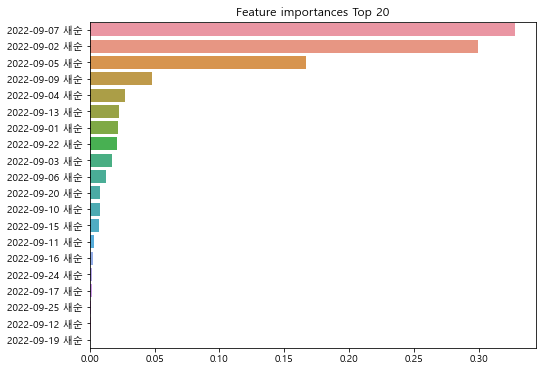

In [16]:
# 변수중요도 TOP20
importances_values = model.feature_importances_
importances = pd.Series(importances_values, index = x_train.columns)
top20 = importances.sort_values(ascending = False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()